# Task: Predict Restaurant Ratings

##### Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

 Steps:
 
 1.Preprocess the dataset by handling missing values,
 encoding categorical variables, and splitting the data
 into training and testing sets.
 
 2.Select a regression algorithm (e.g., linear regression,
 decision tree regression) and train it on the training data.
 
 3.Evaluate the model's performance using appropriate
 regression metrics (e.g., mean squared error, R-squared)
 on the testing data.
 
 4.Interpret the model's results and analyze the most
 influential features affecting restaurant ratings

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import metrics
import numpy as np
from sklearn.tree import DecisionTreeRegressor

### Loading of the dataset

In [2]:
df  = pd.read_csv('Dataset.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


###### Handeling missing values

In [3]:
df.isnull().sum() #checking for null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# This will return a DataFrame with only the rows where 'Cuisines' is null
df_with_null_cuisines = df[df['Cuisines'].isnull()]
df_with_null_cuisines

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [5]:
df['Cuisines'].fillna('Unknown', inplace=True)# filling the Null values with 'Unkown'

#checking
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


###### check for outliers

<Axes: xlabel='Aggregate rating'>

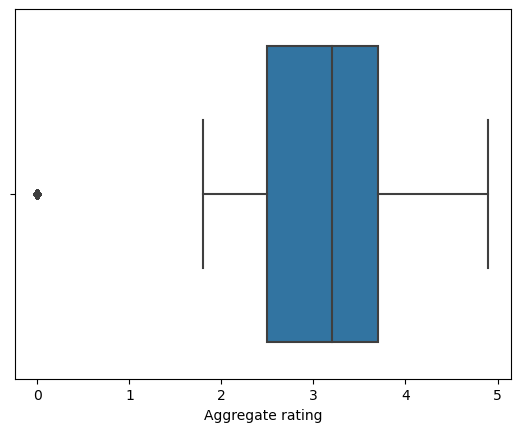

In [7]:
import seaborn as sns

# Assume 'df' is your DataFrame and 'column' is the column in which you want to check for outliers
sns.boxplot(x=df['Aggregate rating'])


###### Checking for correlation with the numerical variables

C:\Users\kings\AppData\Local\Temp\ipykernel_8444\3413461396.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


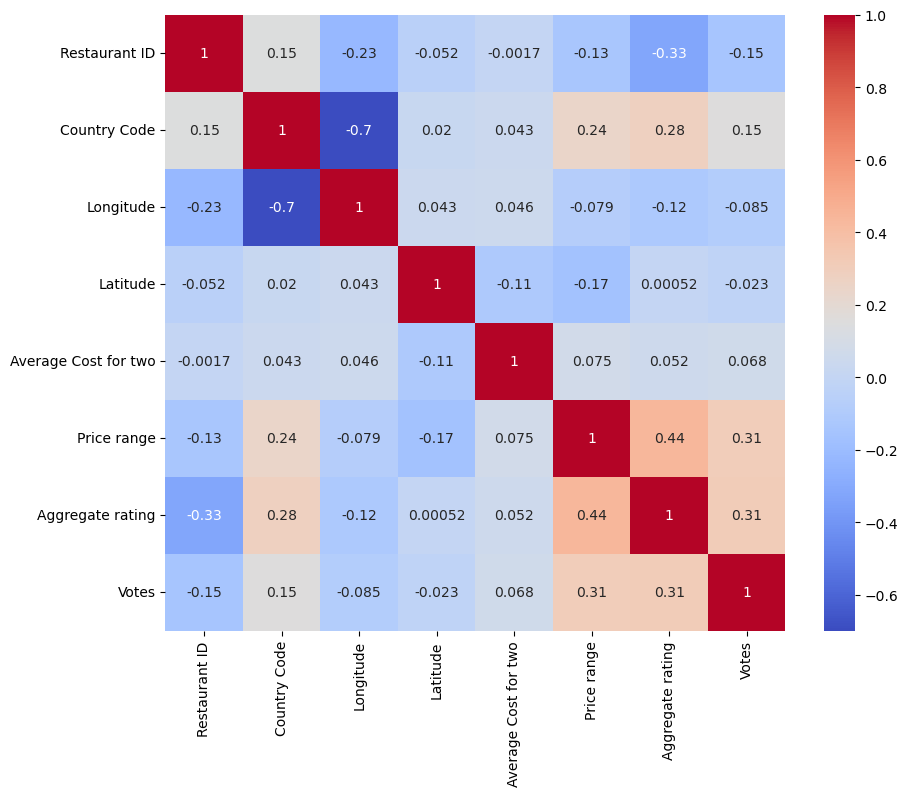

In [8]:

import matplotlib.pyplot as plt
# Calculate correlation matrix
corr_matrix = df.corr()

# If you want to visualize this correlation matrix, you can use seaborn's heatmap function:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


##### Checking for normality 

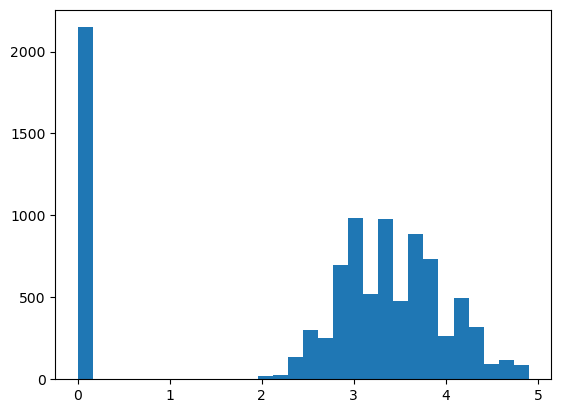

In [9]:

# Assume 'df' is your DataFrame and 'column' is the column you want to check
plt.hist(df['Aggregate rating'], bins=30)
plt.show()


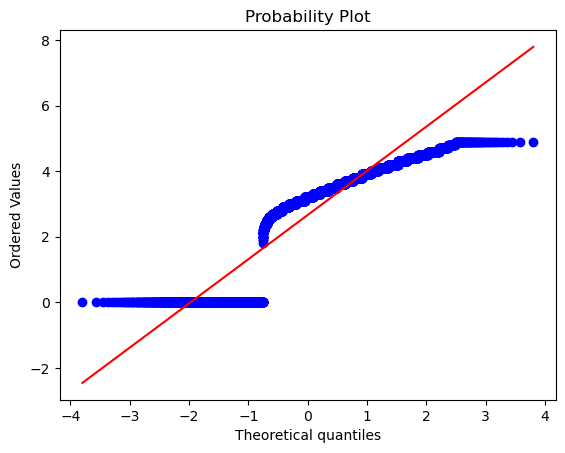

In [10]:
import scipy.stats as stats

# Assume 'df' is your DataFrame and 'column' is the column you want to check
stats.probplot(df['Aggregate rating'], dist="norm", plot=plt)
plt.show()


In [11]:
from scipy.stats import shapiro

# Assume 'df' is your DataFrame and 'column' is the column you want to check
stat, p = shapiro(df['Aggregate rating'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.790, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\kings\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Since the data is not normally distributed we can not apply Linear Regression

###### Encoding categorical variables

In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
#Encode categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = label_encoder.fit_transform(df[column])

In [14]:
df # all the columns values are now converted into numerical values

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,0,3,4.1,1,5,788
9547,5908749,1310,208,140,5962,552,558,29.041297,41.009847,1825,...,11,0,0,0,0,3,4.2,1,5,1034
9548,5915807,3068,208,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,0,4,3.7,5,2,661
9549,5916112,512,208,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,0,4,4.0,1,5,901


### Decision Tree Regressor

##### Split the data into training and testing sets


In [15]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### using Decision Tree Regressor

In [16]:
# Create a Decision Tree Regressor and train it
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = regressor.predict(X_test)

###### Evaluate the model's performance Decision Tree Regressor

In [17]:

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


# R-squared (Coefficient of Determination)
r2 = metrics.r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2}")


Mean Squared Error (MSE): 0.05536891679748821
R-squared (Coefficient of Determination): 0.975673872809597


###### influential features affecting restaurant ratings for Decision Tree Regressor

In [18]:
# Get feature importances
importances = regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                      importance
Votes                   0.898982
Rating color            0.084567
Rating text             0.004821
Restaurant ID           0.002369
Longitude               0.001406
Address                 0.001344
Restaurant Name         0.001299
Cuisines                0.001243
Latitude                0.001149
Average Cost for two    0.000887
Locality                0.000639
Locality Verbose        0.000538
Has Online delivery     0.000263
City                    0.000189
Price range             0.000188
Has Table booking       0.000097
Is delivering now       0.000013
Currency                0.000005
Country Code            0.000003
Switch to order menu    0.000000


### Random Forest Regressor

##### using Random Forest Regressor

In [19]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor and train it
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [21]:
# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)


In [22]:

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")
# R-squared (Coefficient of Determination)
r2 = metrics.r2_score(y_test, y_pred_rf)
print(f"R-squared (Coefficient of Determination): {r2}")


Mean Squared Error (MSE): 0.027221886970172658
R-squared (Coefficient of Determination): 0.9880401654375649


In [23]:
# Get feature importances
importances_rf = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_rf = pd.DataFrame(importances_rf, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)



In [24]:
# Select top 5 features
top_features = feature_importances_rf.nlargest(10, 'importance')

print(top_features)


                      importance
Votes                   0.898995
Rating color            0.081407
Rating text             0.008006
Restaurant ID           0.002259
Longitude               0.001383
Address                 0.001308
Restaurant Name         0.001306
Cuisines                0.001253
Latitude                0.001231
Average Cost for two    0.000951


#### Taking the best features and re building the model

In [25]:
columns =['Restaurant Name',
        'Cuisines',
       'Average Cost for two',
       'Price range',
       'Votes']

In [26]:
#X = df.drop('Aggregate rating', axis=1)
X = df[columns]
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create a Random Forest Regressor and train it
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)


In [28]:

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")
# R-squared (Coefficient of Determination)
r2 = metrics.r2_score(y_test, y_pred_rf)
print(f"R-squared (Coefficient of Determination): {r2}")


Mean Squared Error (MSE): 0.1083713068657595
R-squared (Coefficient of Determination): 0.9523874703157232


## Making Predictions

In [29]:
df_new = pd.read_csv('Dataset.csv')

In [30]:
cat_col = ['Restaurant Name', 'Cuisines']
num_col=['Average Cost for two','Price range','Votes']

In [31]:

import ipywidgets as widgets
from IPython.display import display

# Assuming 'df_new' is your dataframe and 'rf_regressor' is your trained model
# 'cat_col' and 'num_col' are lists of your categorical and numerical columns respectively

# Create dropdowns for categorical columns
cat_dropdowns = {col: widgets.Dropdown(options=df_new[col].drop_duplicates().tolist(), description=col) for col in cat_col}

# Create bounded text inputs for numerical columns
num_inputs = {col: widgets.BoundedFloatText(min=df_new[col].min(), max=df_new[col].max(), description=col) for col in num_col}

# Display the dropdowns and text inputs
for dropdown in cat_dropdowns.values():
    display(dropdown)

for input in num_inputs.values():
    display(input)

# Function to encode and predict
def encode_and_predict(btn):
    # Create a new dataframe with selected values
    new_df = pd.DataFrame({col: [dropdown.value] for col, dropdown in cat_dropdowns.items()})
    new_df = new_df.assign(**{col: [input.value] for col, input in num_inputs.items()})

    # Add missing features with default values (adjust these values as needed)
    for feature in rf_regressor.feature_names_in_:
        if feature not in new_df.columns:
            new_df[feature] = 500  # Set a default value for any missing feature

    # Encode the categorical columns
    for col in cat_col:
        le = LabelEncoder()
        le.fit(df_new[col])  # Fit the encoder on the original dataframe column
        new_df[col] = le.transform(new_df[col])
    
    # Ensure the columns are in the same order as during training
    new_df = new_df[rf_regressor.feature_names_in_]

    # Use the trained model to predict
    prediction = rf_regressor.predict(new_df)
    
    print(f'The predicted value is {prediction[0]}')

# Create a button for prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(encode_and_predict)

# Display the button
display(predict_button)


Dropdown(description='Restaurant Name', options=('Le Petit Souffle', 'Izakaya Kikufuji', 'Heat - Edsa Shangri-…

Dropdown(description='Cuisines', options=('French, Japanese, Desserts', 'Japanese', 'Seafood, Asian, Filipino,…

BoundedFloatText(value=0.0, description='Average Cost for two', max=800000.0)

BoundedFloatText(value=1.0, description='Price range', max=4.0, min=1.0)

BoundedFloatText(value=0.0, description='Votes', max=10934.0)

Button(description='Predict', style=ButtonStyle())